In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format

## 데이터 가져오기

In [20]:
df = pd.read_csv("com_data.csv")
df.head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
5,508810,239047,2018,3,528980,5
6,365169,3650711,2016,4,570320,3
7,189562,7119908,2016,1,1276900,6
8,133518,18642904,2018,10,16844840,75
9,190847,2367117,2015,12,2354660,8


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


## 연도별 매출액 확인

<AxesSubplot:xlabel='년도', ylabel='연매출액'>

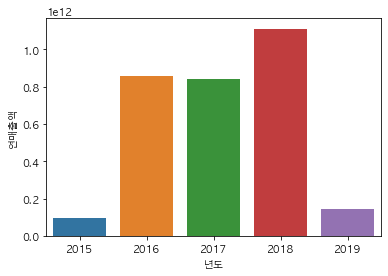

In [22]:
sns.barplot(data=df, x='년도', y='연매출액', ci=None, estimator=sum)

## 회사 별 연매출액 순위 보기

In [23]:
group = df.groupby(df['회사ID']).sum()
group

,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,,,,,
63,135945352752,24216,78,4921538740,12086
95,7883369244,24216,78,2578054120,6492
102,5941271504,16144,68,1390156180,6017
295,670213576,16144,68,618496280,2076
414,236793228,24216,78,931082320,2971
...,...,...,...,...,...
2400284,8843842,14126,49,7388480,33
2437574,214016,2018,5,636740,3
2693684,1428456,12114,57,2628720,18


In [24]:
profit = group.sort_values(by=['연매출액'], ascending=False)
profit.head(50)

,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,,,,,
419945,400950111264,96840,312,40263116800,131735
227415,201953222900,76642,257,32391916020,87340
227414,173560341862,76642,257,33048032220,88314
419977,153075084000,72612,234,14079414180,46279
294649,145796011006,76642,257,3911712480,10278
63,135945352752,24216,78,4921538740,12086
419998,127382131032,72612,234,10894240960,29248
126831,76738090564,76642,257,8652008820,22195
381180,55466949156,76642,257,2423602580,6483


In [25]:
profit_filtered = profit['연매출액'] > 5589816090
len(profit[profit_filtered])

49

In [26]:
top_49 = profit[profit_filtered]
top_49

,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,,,,,
419945,400950111264,96840,312,40263116800,131735
227415,201953222900,76642,257,32391916020,87340
227414,173560341862,76642,257,33048032220,88314
419977,153075084000,72612,234,14079414180,46279
294649,145796011006,76642,257,3911712480,10278
63,135945352752,24216,78,4921538740,12086
419998,127382131032,72612,234,10894240960,29248
126831,76738090564,76642,257,8652008820,22195
381180,55466949156,76642,257,2423602580,6483


## 데이터 기간 확인해보기

In [27]:
df_period = df.sort_values(by=['년도', '월'], ascending=True)
df_period.head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
3,386420,4815584,2015,11,3795900,14
93,145900,4753036,2015,11,4153140,25
97,139359,50216484,2015,11,10547240,39
193,135634,13168146,2015,11,10895560,44
327,190720,3680361,2015,11,945900,4
349,137784,13942269,2015,11,11220820,49
485,179050,4134391,2015,11,2480420,11
583,514711,667698,2015,11,998160,8
592,404139,8694049,2015,11,16557740,96
601,228130,17092968,2015,11,9067300,37


In [28]:
value = df.loc[df['년도'] == 2019]
value2019 = value.sort_values(by=['연매출액','월별_연금보험료'], ascending=False)
value2019.head(20)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
71565,419945,10058868796,2019,10,953121400,2871
6086,419945,10058868796,2019,12,952530380,2872
35822,419945,10058868796,2019,11,952045040,2870
89842,419945,10058868796,2019,9,933819300,2779
25614,419945,10058868796,2019,7,928921380,2762
70918,419945,10058868796,2019,8,927833840,2753
88487,419945,10058868796,2019,6,870767520,2757
13109,419945,10058868796,2019,4,870665760,2765
53151,419945,10058868796,2019,5,870631680,2770
60354,419945,10058868796,2019,2,867816240,2745


In [29]:
len(value)

852

In [30]:
value_2015 = df.loc[df['년도'] == 2015]
len(value_2015)

3586

In [31]:
value_2016 = df.loc[df['년도'] == 2016]
len(value_2016)

37685

In [32]:
value_2017 = df.loc[df['년도'] == 2017]
len(value_2017)

17806

In [33]:
value_2018 = df.loc[df['년도'] == 2018]
len(value_2018)

39872

In [34]:
value_2019 = df.loc[df['년도'] == 2019]
len(value_2019)

852

## 각 회사별 평균 연봉 월급 알아보기

In [35]:
group['인당보험료'] = group['월별_연금보험료'] / group['월별_직원수']
print(group['인당보험료'])

회사ID
63        407209.89078
95        397112.46457
102       231038.08875
295       297926.91715
414       313390.21205
              ...     
2400284   223893.33333
2437574   212246.66667
2693684   146040.00000
3312354   437400.00000
5159723   251456.00000
Name: 인당보험료, Length: 5000, dtype: float64


## 국민연금 보험료는 9%, 평균월급 알아보기

In [36]:
group['평균월급'] = group['인당보험료'] / 9 * 100
print(group['평균월급'])

회사ID
63        4524554.34203
95        4412360.71746
102       2567089.87498
295       3310299.07943
414       3482113.46722
               ...     
2400284   2487703.70370
2437574   2358296.29630
2693684   1622666.66667
3312354   4860000.00000
5159723   2793955.55556
Name: 평균월급, Length: 5000, dtype: float64


/Users/tk/miniforge3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


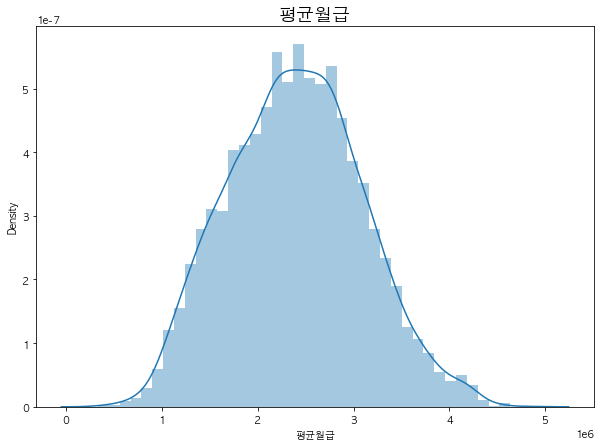

In [37]:
plt.figure(figsize=(10, 7))
sns.distplot(group.loc[group['평균월급'].notnull(), '평균월급'])
plt.title('평균월급', fontsize=18)
plt.show()

## 평균연봉 구하기 (12달)

In [39]:
group['평균연봉'] = group['평균월급'] * 12

In [40]:
group['평균연봉'].notnull().sum()
print(group['평균연봉'])

회사ID
63        54294652.10436
95        52948328.60957
102       30805078.49981
295       39723588.95311
414       41785361.60664
               ...      
2400284   29852444.44444
2437574   28299555.55556
2693684   19472000.00000
3312354   58320000.00000
5159723   33527466.66667
Name: 평균연봉, Length: 5000, dtype: float64


/Users/tk/miniforge3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


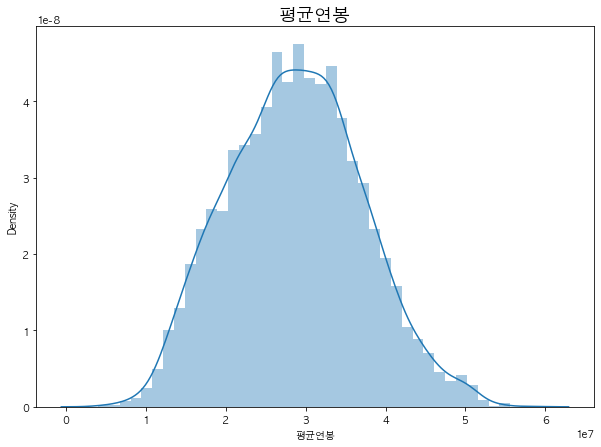

In [41]:
plt.figure(figsize=(10, 7))
sns.distplot(group.loc[group['평균연봉'].notnull(), '평균연봉'])
plt.title('평균연봉', fontsize=18)
plt.show()

## 월 보험료, 월 직원수 포함시켜서 데이터프레임 만들기

In [47]:
group['평균_월_보험료'] = group['월별_연금보험료'] / group['월']
print(group['평균_월_보험료'])

회사ID
63        63096650.51282
95        33051975.89744
102       20443473.23529
295        9095533.52941
414       11936952.82051
               ...      
2400284     150785.30612
2437574     127348.00000
2693684      46117.89474
3312354     131220.00000
5159723     104773.33333
Name: 평균_월_보험료, Length: 5000, dtype: float64


In [49]:
group['평균_월_직원수'] = group['월별_직원수'] / group['월']
print(group['평균_월_직원수'])

회사ID
63        154.94872
95         83.23077
102        88.48529
295        30.52941
414        38.08974
             ...   
2400284     0.67347
2437574     0.60000
2693684     0.31579
3312354     0.30000
5159723     0.41667
Name: 평균_월_직원수, Length: 5000, dtype: float64


In [53]:
group.drop(columns = ['월_보험료', '월_직원수'])

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,평균_월_보험료,평균_월_직원수
회사ID,,,,,,,,,,
63,135945352752,24216,78,4921538740,12086,407209.89078,4524554.34203,54294652.10436,63096650.51282,154.94872
95,7883369244,24216,78,2578054120,6492,397112.46457,4412360.71746,52948328.60957,33051975.89744,83.23077
102,5941271504,16144,68,1390156180,6017,231038.08875,2567089.87498,30805078.49981,20443473.23529,88.48529
295,670213576,16144,68,618496280,2076,297926.91715,3310299.07943,39723588.95311,9095533.52941,30.52941
414,236793228,24216,78,931082320,2971,313390.21205,3482113.46722,41785361.60664,11936952.82051,38.08974
...,...,...,...,...,...,...,...,...,...,...
2400284,8843842,14126,49,7388480,33,223893.33333,2487703.70370,29852444.44444,150785.30612,0.67347
2437574,214016,2018,5,636740,3,212246.66667,2358296.29630,28299555.55556,127348.00000,0.60000
2693684,1428456,12114,57,2628720,18,146040.00000,1622666.66667,19472000.00000,46117.89474,0.31579


In [54]:
group['평균_연매출액'] = group['연매출액'] / group['년도']
group

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,월_보험료,월_직원수,평균_월_보험료,평균_월_직원수,평균_연매출액
회사ID,,,,,,,,,,,,,
63,135945352752,24216,78,4921538740,12086,407209.89078,4524554.34203,54294652.10436,63096650.51282,154.94872,63096650.51282,154.94872,5613864.91378
95,7883369244,24216,78,2578054120,6492,397112.46457,4412360.71746,52948328.60957,33051975.89744,83.23077,33051975.89744,83.23077,325543.82408
102,5941271504,16144,68,1390156180,6017,231038.08875,2567089.87498,30805078.49981,20443473.23529,88.48529,20443473.23529,88.48529,368017.31318
295,670213576,16144,68,618496280,2076,297926.91715,3310299.07943,39723588.95311,9095533.52941,30.52941,9095533.52941,30.52941,41514.71606
414,236793228,24216,78,931082320,2971,313390.21205,3482113.46722,41785361.60664,11936952.82051,38.08974,11936952.82051,38.08974,9778.37909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400284,8843842,14126,49,7388480,33,223893.33333,2487703.70370,29852444.44444,150785.30612,0.67347,150785.30612,0.67347,626.06838
2437574,214016,2018,5,636740,3,212246.66667,2358296.29630,28299555.55556,127348.00000,0.60000,127348.00000,0.60000,106.05352
2693684,1428456,12114,57,2628720,18,146040.00000,1622666.66667,19472000.00000,46117.89474,0.31579,46117.89474,0.31579,117.91778


In [58]:
group['margin'] = group['평균_연매출액'] - group['평균연봉']
group

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,월_보험료,월_직원수,평균_월_보험료,평균_월_직원수,평균_연매출액,margin
회사ID,,,,,,,,,,,,,,
63,135945352752,24216,78,4921538740,12086,407209.89078,4524554.34203,54294652.10436,63096650.51282,154.94872,63096650.51282,154.94872,5613864.91378,-48680787.19059
95,7883369244,24216,78,2578054120,6492,397112.46457,4412360.71746,52948328.60957,33051975.89744,83.23077,33051975.89744,83.23077,325543.82408,-52622784.78549
102,5941271504,16144,68,1390156180,6017,231038.08875,2567089.87498,30805078.49981,20443473.23529,88.48529,20443473.23529,88.48529,368017.31318,-30437061.18662
295,670213576,16144,68,618496280,2076,297926.91715,3310299.07943,39723588.95311,9095533.52941,30.52941,9095533.52941,30.52941,41514.71606,-39682074.23706
414,236793228,24216,78,931082320,2971,313390.21205,3482113.46722,41785361.60664,11936952.82051,38.08974,11936952.82051,38.08974,9778.37909,-41775583.22755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400284,8843842,14126,49,7388480,33,223893.33333,2487703.70370,29852444.44444,150785.30612,0.67347,150785.30612,0.67347,626.06838,-29851818.37606
2437574,214016,2018,5,636740,3,212246.66667,2358296.29630,28299555.55556,127348.00000,0.60000,127348.00000,0.60000,106.05352,-28299449.50204
2693684,1428456,12114,57,2628720,18,146040.00000,1622666.66667,19472000.00000,46117.89474,0.31579,46117.89474,0.31579,117.91778,-19471882.08222


In [60]:
group.sort_values('margin', ascending=False).head(10)

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,월_보험료,월_직원수,평균_월_보험료,평균_월_직원수,평균_연매출액,margin
회사ID,,,,,,,,,,,,,,
604914,792519,2018,2,90000,3,30000.00000,333333.33333,4000000.00000,45000.00000,1.50000,45000.00000,1.50000,392.72498,-3999607.27502
124450,3886886,28222,101,2118880,53,39978.86792,444209.64361,5330515.72327,20979.00990,0.52475,20979.00990,0.52475,137.72539,-5330377.99788
549885,575760,8072,42,747000,17,43941.17647,488235.29412,5858823.52941,17785.71429,0.40476,17785.71429,0.40476,71.32805,-5858752.20136
293483,337620,12108,26,810160,18,45008.88889,500098.76543,6001185.18519,31160.00000,0.69231,31160.00000,0.69231,27.88404,-6001157.30114
68282,1635106,22198,77,2862000,53,54000.00000,600000.00000,7200000.00000,37168.83117,0.68831,37168.83117,0.68831,73.66006,-7199926.33994
124595,1938360,24192,78,3723520,68,54757.64706,608418.30065,7301019.60784,47737.43590,0.87179,47737.43590,0.87179,80.12401,-7300939.48384
369111,46966976,40331,122,3929060,71,55338.87324,614876.36933,7378516.43192,32205.40984,0.58197,32205.40984,0.58197,1164.53785,-7377351.89408
278074,4547640,24216,78,2125200,36,59033.33333,655925.92593,7871111.11111,27246.15385,0.46154,27246.15385,0.46154,187.79485,-7870923.31626
381981,90255354,76642,257,165156320,2777,59472.92762,660810.30689,7929723.68263,642631.59533,10.80545,642631.59533,10.80545,1177.62264,-7928546.06000


In [61]:
group.sort_values('margin', ascending=True).head(10)

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,월_보험료,월_직원수,평균_월_보험료,평균_월_직원수,평균_연매출액,margin
회사ID,,,,,,,,,,,,,,
3312354,7257815,10095,50,6561000,15,437400.00000,4860000.00000,58320000.00000,131220.00000,0.30000,131220.00000,0.30000,718.95146,-58319281.04854
283380,15855408,24216,78,19623240,48,408817.50000,4542416.66667,54509000.00000,251580.00000,0.61538,251580.00000,0.61538,654.74926,-54508345.25074
416507,15938388,24216,78,20439000,50,408780.00000,4542000.00000,54504000.00000,262038.46154,0.64103,262038.46154,0.64103,658.17592,-54503341.82408
557976,167802,6054,33,4741100,12,395091.66667,4389907.40741,52678888.88889,143669.69697,0.36364,143669.69697,0.36364,27.71754,-52678861.17135
95,7883369244,24216,78,2578054120,6492,397112.46457,4412360.71746,52948328.60957,33051975.89744,83.23077,33051975.89744,83.23077,325543.82408,-52622784.78549
441330,480178188,24216,78,280630740,717,391395.73222,4348841.46908,52186097.62901,3597830.00000,9.19231,3597830.00000,9.19231,19828.96383,-52166268.66518
60154,457252812,18162,72,22295880,57,391155.78947,4346175.43860,52154105.26316,309665.00000,0.79167,309665.00000,0.79167,25176.34688,-52128928.91628
34029,20591484,24216,78,40144700,103,389754.36893,4330604.09924,51967249.19094,514675.64103,1.32051,514675.64103,1.32051,850.32557,-51966398.86537
5452,2523765110,20180,75,153459140,397,386546.95214,4294966.13490,51539593.61881,2046121.86667,5.29333,2046121.86667,5.29333,125062.69128,-51414530.92753


## 스타트업 특성상 투자가 많이 이루어져야 하기 때문에, 마진이 높은 기업이 유니콘이라고 할 수 없다

In [66]:
group.sort_values('연매출액', ascending=False).head(10)

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,월_보험료,월_직원수,평균_월_보험료,평균_월_직원수,평균_연매출액,margin
회사ID,,,,,,,,,,,,,,
419945,400950111264,96840,312,40263116800,131735,305637.20196,3395968.91065,40751626.92780,129048451.28205,422.22756,129048451.28205,422.22756,4140335.72144,-36611291.20636
227415,201953222900,76642,257,32391916020,87340,370871.49095,4120794.34394,49449532.12732,126038583.73541,339.84436,126038583.73541,339.84436,2635020.26174,-46814511.86558
227414,173560341862,76642,257,33048032220,88314,374210.56933,4157895.21480,49894742.57762,128591565.05837,343.63424,128591565.05837,343.63424,2264559.14332,-47630183.43431
419977,153075084000,72612,234,14079414180,46279,304229.00624,3380322.29161,40563867.49930,60168436.66667,197.77350,60168436.66667,197.77350,2108123.78119,-38455743.71810
294649,145796011006,76642,257,3911712480,10278,380590.82312,4228786.92353,50745443.08231,15220671.12840,39.99222,15220671.12840,39.99222,1902299.14415,-48843143.93816
63,135945352752,24216,78,4921538740,12086,407209.89078,4524554.34203,54294652.10436,63096650.51282,154.94872,63096650.51282,154.94872,5613864.91378,-48680787.19059
419998,127382131032,72612,234,10894240960,29248,372478.15098,4138646.12205,49663753.46462,46556585.29915,124.99145,46556585.29915,124.99145,1754284.84317,-47909468.62146
126831,76738090564,76642,257,8652008820,22195,389817.92386,4331310.26507,51975723.18090,33665403.96887,86.36187,33665403.96887,86.36187,1001253.75857,-50974469.42233
381180,55466949156,76642,257,2423602580,6483,373839.66991,4153774.11007,49845289.32079,9430360.23346,25.22568,9430360.23346,25.22568,723714.79288,-49121574.52791
